## Title: Solving ODEs Using Euler's Method
### Author: Sara Shamekh - Olivier Pauluis
### Description: This notebook demonstrates how to numerically solve first-order ODEs using Euler's method.


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML


## Euler's Method Overview
Euler's method is a simple numerical technique for solving ordinary differential equations (ODEs).
Given a first-order ODE in the form of:
$$\frac{dy}{dt} = f(t, y)
$$
with initial condition $ y(t_0) = y_0 $, Euler's method approximates the solution by taking small time steps, $ h $, and iteratively updating the solution.

The Euler update formula is:
$$
y_{n+1} = y_n + h \cdot f(t_n, y_n)
$$
This process is repeated until the desired time is reached.



In [43]:
# Define the ODE function and implement Euler's method
def euler_method(f, t0, y0, h, t_end):
    """
    Euler method for solving ODEs.
    
    Parameters:
    f (function): Function representing the ODE dy/dt = f(t, y).
    t0 (float): Initial time.
    y0 (float): Initial value of the dependent variable y.
    h (float): Step size (time increment).
    t_end (float): End time for the simulation.
    
    Returns:
    t_values (numpy array): Array of time values.
    y_values (numpy array): Array of y values at each time step.
    """
    t_values = np.arange(t0, t_end + h, h)  # Time array
    y_values = np.zeros(len(t_values))      # Array to store y values
    y_values[0] = y0                        # Set the initial condition
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])  # Euler update step
    
    return t_values, y_values



## Example 1: Solving a Simple Exponential Decay/Growth ODE
Let's solve the ODE:
$$ \frac{dy}{dt} = ky, \quad y(0) = 1 $$
This equation represents exponential decay for k < 0 and exponetial growth if k>0. We'll use Euler's method to approximate the solution.

Lets assume $k=-2$, so we are deadling with an exponetial decay!

## Code in the ODE function

In [38]:
def ode1(t, y, k = -2):
    """
    inputs: 
        t: the independent variable at which we want to find our solution
        y: the dependt variable 
        k: the parameter of our ODE (dy/dt = ky). We set this to defualt 2. but you can change it so to model a different ODE!
    output: the derivative dy/dt of our function
    """
    return k * y
def yourODE(t,y,otherinput=None):
    """
    you can code in your own ODE,
    otherinput is a placeholder for potential parameters of your ODE!
    """
    return y**2*t**2

# Set parameters for Euler's method

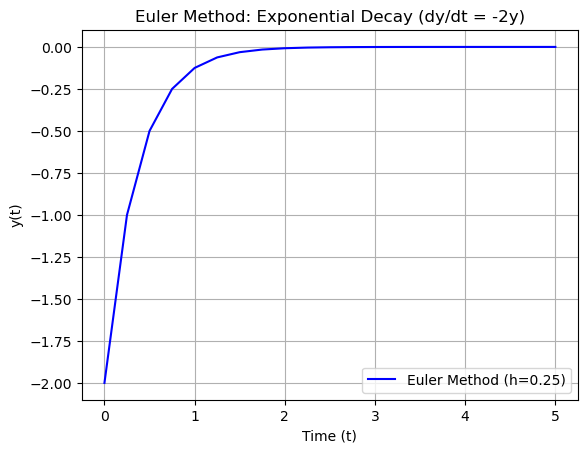

In [22]:
t0 = 0      # Initial time
y0 = -2      # Initial condition
h = 0.25     # Step size
t_end = 5   # End time

# Solve the ODE using Euler's method
t_values, y_values = euler_method(ode1, t0, y0, h, t_end)



# Plot the numerical solution
plt.plot(t_values, y_values, 'b-', label="Euler Method (h=0.25)")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Euler Method: Exponential Decay (dy/dt = -2y)')
plt.legend()
plt.grid(True)
plt.show()




Explanation: In this plot, we see how Euler's method approximates the solution for the given ODE.

## Comparison with the analytical solution

For this ODE, the exact analytical solution is:
$$
y(t) = y_0 e^{-2t}
$$
We'll compare Euler's method with the exact solution.



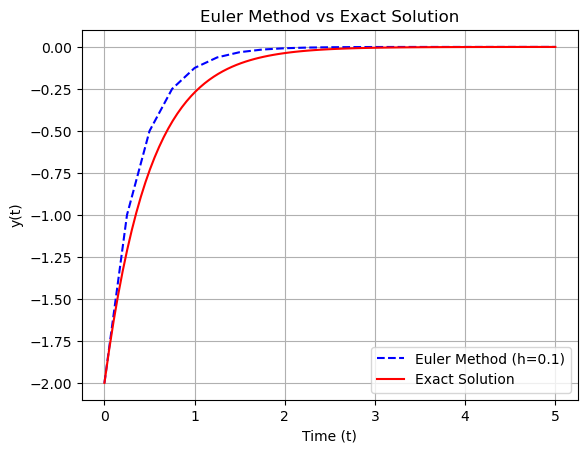

In [24]:

# Exact solution for comparison
def exact_solution(t):
    return y0 * np.exp(-2 * t)

# Compute the exact solution
t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)

# Plot both solutions for comparison
plt.plot(t_values, y_values, 'b--', label="Euler Method (h=0.1)")
plt.plot(t_exact, y_exact, 'r-', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Euler Method vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()


## Error Analysis
Euler's method introduces numerical error due to the approximation. The error is smaller when the step size \( h \) is smaller.
Let's see how changing the step size affects the accuracy of the solution.


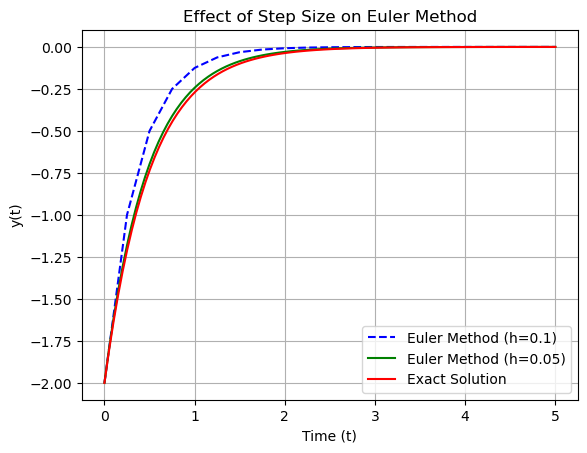

In [25]:
# Solve the ODE with a smaller step size (h=0.05)
h_small = 0.05
t_values_small, y_values_small = euler_method(ode1, t0, y0, h_small, t_end)

# Plot both step sizes for comparison
plt.plot(t_values, y_values, 'b--', label="Euler Method (h=0.1)")
plt.plot(t_values_small, y_values_small, 'g-', label="Euler Method (h=0.05)")
plt.plot(t_exact, y_exact, 'r-', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Effect of Step Size on Euler Method')
plt.legend()
plt.grid(True)

plt.show()


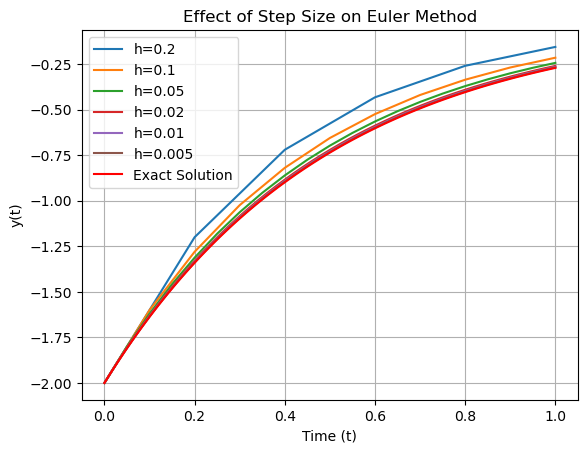

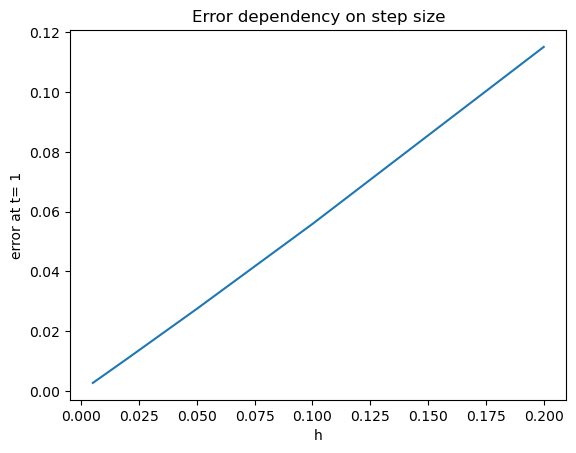

In [28]:
h_values = [0.2,0.1,0.05,0.02,0.01, 0.005]
y_end = np.zeros_like(h_values)
t0 = 0
y_0 = 1.
t_end = 1.0
t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)
plt.figure()
for i,h in enumerate(h_values):
    t_values, y_values = euler_method(ode1, t0, y0, h, t_end)
    plt.plot(t_values, y_values, label="h="+str(h))
    y_end[i] = y_values[-1]
plt.plot(t_exact, y_exact, 'r-', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Effect of Step Size on Euler Method')
plt.legend()
plt.grid(True)


plt.figure()
error = np.abs(y_end - y_exact[-1])
plt.plot(h_values,error)
plt.xlabel('h')
plt.ylabel('error at t= 1')
plt.title('Error dependency on step size')
plt.show() 

### Convex and Concave Functions and Errors with Euler's Method

#### Convex Functions

A **convex function** is characterized by its shape bending **upward**. Mathematically, a function \( y(t) \) is convex if its second derivative is non-negative, $ y''(t) \geq 0$, for all $ t $. This means that the slope of the function increases as you move along the curve.

##### Example
An example of a convex function is $ y(t) = \exp(t) $. In this case, the function grows exponentially, with the second derivative $ y''(t) = \exp(t)$ always being positive, causing the function to bend upwards.
 
##### Euler Method on Convex Functions
When the **Euler method** is applied to convex functions, the numerical approximation tends to **undershoot** the true solution. This happens because the Euler method uses the slope of the tangent line at each point to estimate the next value, and for convex functions, this slope lies **below** the actual curve.

**Key Insight**: The approximation will always lag behind the true function, producing values that are **too low** - an underestimation problem.
The plot on the left showcases a convex function and its underestimated numerical version when using Euler method.

#### Concave Functions

A **concave function** is characterized by its shape bending **downward**. Mathematically, a function $ y(t)$ is concave if its second derivative is non-positive, $ y''(t) \leq 0 $, for all $ t $. This means that the slope of the function decreases as you move along the curve.

##### Example
An example of a concave function is $ y(t) = -\exp(-t)$. In this case, the function decreases exponentially, with the second derivative $ y''(t) = \exp(-t) $ always being negative, causing the function to bend downwards.

##### Euler Method on Concave Functions
When the **Euler method** is applied to concave functions, the numerical approximation tends to **overshoot** the true solution. The Euler method's use of the tangent line at each point results in estimates that are **above** the actual curve for concave functions.

**Key Insight**: The approximation will exceed the true function, producing values that are **too high**- an overestimation problem. See the plot below on the right.

### Summary of Errors


- **Convex Functions**: The Euler method **undershoots** the true solution because the linear approximation is always below the upward-bending curve.
- **Concave Functions**: The Euler method **overshoots** the true solution because the linear approximation is always above the downward-bending curve.

In both cases, these errors arise because the Euler method uses a linear tangent approximation that cannot capture the curvature of the function.


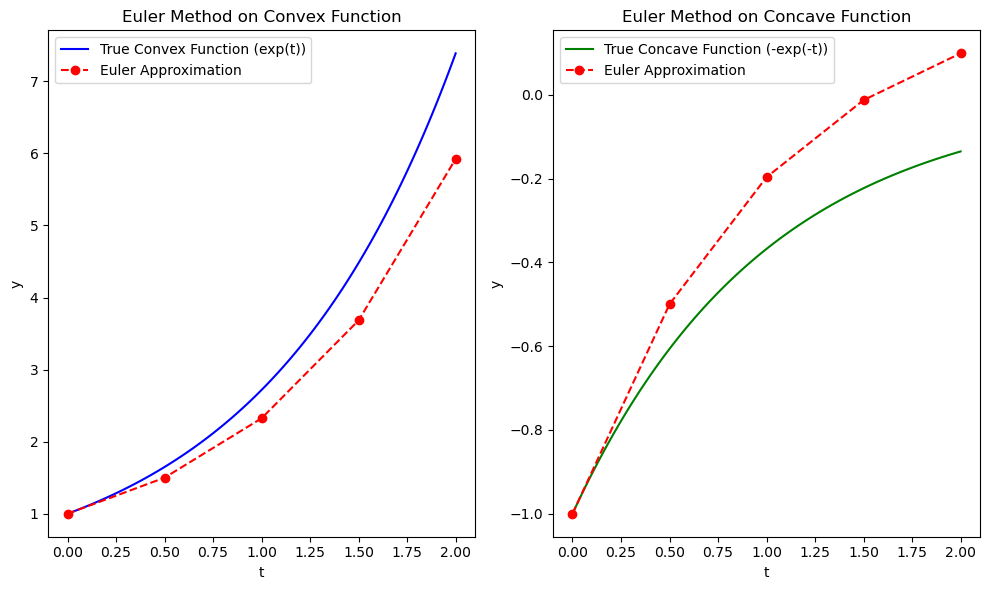

In [39]:

# Define a convex function (y = exp(t)) and a concave function (y = -exp(-t))
def convex_func(t):
    return np.exp(t)

def concave_func(t):
    return -np.exp(-t)

# Define the derivative for both functions
def convex_derivative(t, y):
    return np.exp(t)

def concave_derivative(t, y):
    return np.exp(-t)

# Euler method implementation
def euler_method(f_prime, y0, t_range, h):
    t_values = np.arange(t_range[0], t_range[1] + h, h)
    y_values = [y0]
    y_current = y0
    for t in t_values[:-1]:
        y_next = y_current + h * f_prime(t, y_current)
        y_values.append(y_next)
        y_current = y_next
    return t_values, np.array(y_values)

# Set up parameters
h = 0.5  # Step size
t_range = (0, 2)  # Time range
y0_convex = 1  # Initial condition for convex function
y0_concave = -1  # Initial condition for concave function

# Generate true solutions
t_values = np.linspace(t_range[0], t_range[1], 100)
convex_true = convex_func(t_values)
concave_true = concave_func(t_values)

# Apply Euler method to both convex and concave functions
t_euler_convex, convex_euler_approx = euler_method(convex_derivative, y0_convex, t_range, h)
t_euler_concave, concave_euler_approx = euler_method(concave_derivative, y0_concave, t_range, h)

# Plot the results
plt.figure(figsize=(10, 6))

# Convex function plot
plt.subplot(1, 2, 1)
plt.plot(t_values, convex_true, label="True Convex Function (exp(t))", color="blue")
plt.plot(t_euler_convex, convex_euler_approx, 'o--', label="Euler Approximation", color="red")
plt.title("Euler Method on Convex Function")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()

# Concave function plot
plt.subplot(1, 2, 2)
plt.plot(t_values, concave_true, label="True Concave Function (-exp(-t))", color="green")
plt.plot(t_euler_concave, concave_euler_approx, 'o--', label="Euler Approximation", color="red")
plt.title("Euler Method on Concave Function")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()


# Example 2: a more complex ODE

Lets look at solunt to the following ODE, which we have discussed in class, using the Euler method:

### $$ \ln(t) \frac{dy}{dt} + y = \cot(t) $$

This is a first-order linear ODE, and we can use Euler's method to approximate its solution numerically.

Here’s how you can add a block for this ODE using Euler's method:

Rewriting the ODE:

$$
\frac{dy}{dt} = \frac{\cot(t) - y}{\ln(t)}
$$


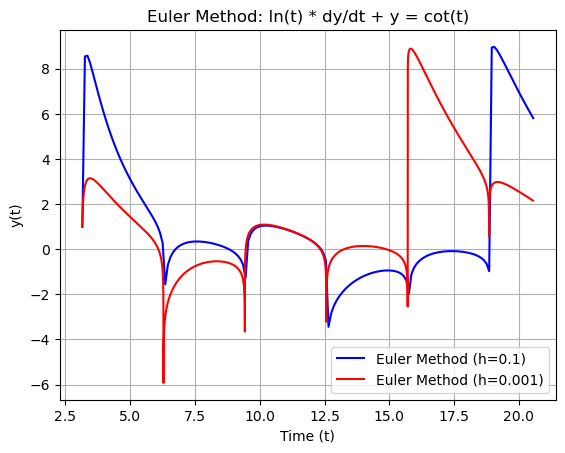

In [30]:
 # Define the ODE function for ln(t) * dy/dt + y = cot(t)
def ode_ln_cot(t, y):
    """
    ODE: ln(t) * dy/dt + y = cot(t)
    
    Parameters:
    t (float): Time variable.
    y (float): Dependent variable y(t).
    
    Returns:
    float: The rate of change dy/dt.
    """
    if t == 0:  # Prevent division by zero for ln(0)
        raise ValueError("t cannot be zero in ln(t)")
    
    return (np.cos(t) / np.sin(t) - y) / np.log(t)  # cot(t) = cos(t) / sin(t)

# Implement Euler's method for the given ODE
def euler_method_ode_ln_cot(f, t0, y0, h, t_end):
    """
    Euler method for solving the ODE: ln(t) * dy/dt + y = cot(t).
    
    Parameters:
    f (function): Function representing the ODE.
    t0 (float): Initial time.
    y0 (float): Initial value of the dependent variable y.
    h (float): Step size (time increment).
    t_end (float): End time for the simulation.
    
    Returns:
    t_values (numpy array): Array of time values.
    y_values (numpy array): Array of y values at each time step.
    """
    t_values = np.arange(t0, t_end + h, h)  # Time array
    y_values = np.zeros(len(t_values))      # Array to store y values
    y_values[0] = y0                        # Set the initial condition
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])  # Euler update step
    
    return t_values, y_values

# Set parameters for Euler's method
t0 = 3.153      # Initial time (we avoid t=0 because of ln(t))
y0 = 1        # Initial condition for y
h = 0.1      # Step size
t_end = 20.54     # End time

# Solve the ODE using Euler's method
t_values, y_values = euler_method_ode_ln_cot(ode_ln_cot, t0, y0, h, t_end)
# Plot the numerical solution
plt.plot(t_values, y_values, 'b-', label=f"Euler Method (h={h})")
  
# set a new h
h = 0.001
# Solve the ODE using Euler's method
t_values, y_values = euler_method_ode_ln_cot(ode_ln_cot, t0, y0, h, t_end)
# Plot the numerical solution

plt.plot(t_values, y_values, 'r-', label=f"Euler Method (h={h})")
 

plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Euler Method: ln(t) * dy/dt + y = cot(t)')
plt.legend()
plt.grid(True)
plt.show()

# What is happening???

We have already investigated this function in our exsitance and uniqueness and obsereve that, without solving, the interval of exsistace has many wholes! meaning there ts at which our function is not defined!! 

We have already observed that the interval of existence for this ODE is:

$$(0, 1) \cup (1, \pi) \cup (\pi, 2\pi) \cup (2\pi, 3\pi) \cup \dots $$ 
and the initial value will determine which interval the domain where our solion given the intial contion is defined. 
Thus given the $t_0$, and $y_0$, we can only have one of the domains above for which we have our solution. Getting close to the boundarys ($n\pi$), the function blows up. 

Lets assume that our intial condition is 
$$y(2)=3$$, thus the domain of our solution is $(1, \pi)$. We then set $t_0 = 2$ and $t_{end} = \pi$



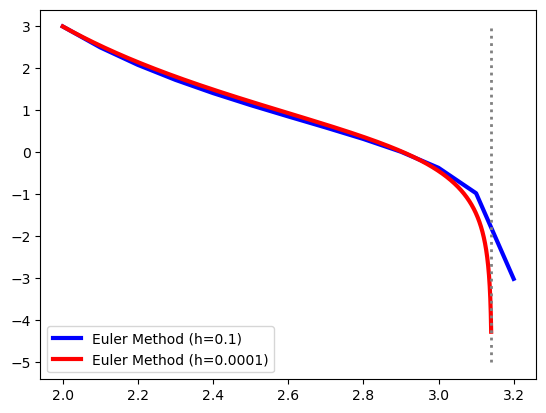

In [33]:

# Set parameters for Euler's method
t0 = 2     # Initial time (we avoid t=0 because of ln(t))
y0 = 3        # Initial condition for y
h = 0.1      # Step size
t_end = 3.14     # End time

# Solve the ODE using Euler's method
t_values, y_values = euler_method_ode_ln_cot(ode_ln_cot, t0, y0, h, t_end)
# Plot the numerical solution
plt.plot(t_values, y_values, 'b-', label=f"Euler Method (h={h})",linewidth = 3)
# Set parameters for Euler's method
t0 = 2     # Initial time (we avoid t=0 because of ln(t))
y0 = 3        # Initial condition for y
h = 0.0001      # Step size
t_end = 3.14     # End time

# Solve the ODE using Euler's method
t_values, y_values = euler_method_ode_ln_cot(ode_ln_cot, t0, y0, h, t_end)
# Plot the numerical solution
plt.plot(t_values, y_values, 'r-', label=f"Euler Method (h={h})",linewidth = 3)
plt.plot([t_end,t_end],[-5,3],color = 'gray', linestyle = ':',linewidth = 2)
plt.ylim()
plt.legend()
plt.show()

# Higher-Order Euler Methods

Euler's method is a first-order method for solving ordinary differential equations (ODEs). While it's easy to implement, its accuracy is limited due to the first-order approximation. This means that errors can accumulate quickly, especially if the step size \( h \) is not small enough.

To improve the accuracy, higher-order Euler methods can be used. One popular higher-order extension is the **Second-Order (Improved) Euler Method**, also known as the **Heun's Method**. This method improves the accuracy by taking an additional step that averages the slope at the beginning and the end of the interval.

### Second-Order Euler Method (Heun's Method)
In the second-order Euler method, we compute two slopes:
1. **Initial slope**: The slope at the beginning of the interval.
   $$
   k_1 = f(t_n, y_n)
   $$
2. **Predicted slope**: The slope at the predicted value using the initial slope.
   $$
   y_{\text{predict}} = y_n + h \cdot k_1
    $$
   $$
   k_2 = f(t_n + h, y_{\text{predict}})
   $$

The final value of \( y \) is then updated by averaging these two slopes:
$$
y_{n+1} = y_n + \frac{h}{2} (k_1 + k_2)
$$



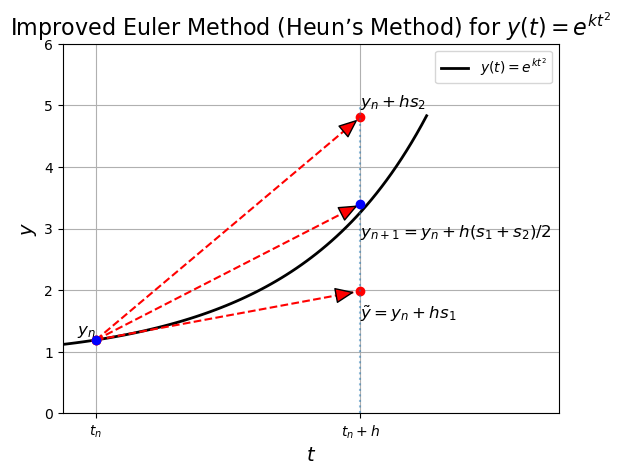

In [51]:
import numpy as np
import matplotlib.pyplot as plt
def func(ts,k = 0.7,):
    return np.exp(k*(ts**2))
def func_deriv(ts,k = 0.7,):
    return 2*k*ts*np.exp(k*ts)
# Create a time vector for plotting the exponential function y(t) = exp(t)
t_values = np.linspace(0, 1.5, 100)
y_values = func(t_values) # Example function for y(t) = exp(t)

# Initialize points for Euler approximation
t_n = 0.5 # Initial point
y_n = func(t_n)  # Initial value on curve
h = 0.8  # Step size

# Slopes for Euler method
s1 = func_deriv(t_n)  # slope at (t_n, y_n), which is the value of exp(t_n)
y_tilde = y_n + h * s1  # intermediate point (y tilde)
s2 = func_deriv(t_n + h)  # slope at (t_n + h, y_tilde), which is exp(t_n + h)
y_n1 = y_n + h * (s1 + s2) / 2  # improved Euler method (Heun's method)
y_n2 = y_n + h*s2
# Plot the actual function y(t)
plt.plot(t_values, y_values, 'k-', label='$y(t) =e^{kt^2}$', linewidth=2)

# Plot points and lines for Euler method approximation
plt.plot([t_n, t_n + h], [y_n, y_tilde], 'r--',  marker='o')  # first approximation
plt.plot([t_n, t_n + h], [y_n, y_n1], 'r--')  # second approximation
plt.plot([t_n, t_n + h], [y_n, y_n2], 'r--', marker='o')  # second approximation



# Manually add arrowheads using annotate
plt.annotate('', xy=(t_n + h , y_n +h * s1), xytext=(t_n + 0.9*h, y_n + 0.9* h * s1),
             arrowprops=dict(facecolor='red', shrink=0.3, headwidth=10))

# Manually add arrowheads using annotate
plt.annotate('', xy=(t_n + h*1.02 , y_n +h * (s2 + s1)*1.02/2), xytext=(t_n + 0.9*h, y_n + 0.9* h * (s2 + s1)/2),
             arrowprops=dict(facecolor='red', shrink=0.3, headwidth=10))

plt.annotate('', xy=(t_n + h*1.02 , y_n + 1.02*h * s2 ), xytext=(t_n + 0.9*h, y_n + 0.9* h *s2),
             arrowprops=dict(facecolor='red', shrink=0.3, headwidth=10))
# Plot vectors for slopes s1 and s2
# plt.quiver(t_n,  y_n, h, h * s1,  angles='xy', scale_units='xy', scale=1,color='red',  label='$s_1 = f(t_n, y_n)$', headwidth=6)
# plt.quiver(t_n , y_n, h, h * s2, angles='xy', scale_units='xy', scale=1, color='red', label=r'$s_2 = f(t_{n+1}, \tilde{y})$', headwidth=6)

# Plot the points (y_n, y_n1)
plt.scatter([t_n, t_n + h], [y_n, y_n1], color='blue', zorder=5)

# Label the points and lines
plt.text(t_n, y_n, '$y_n$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(t_n + h , y_n1 -0.3 , '$y_{n+1} = y_n + h(s_1 + s_2)/2$', fontsize=12, verticalalignment='top', horizontalalignment='left')
plt.text(t_n + h, y_tilde -0.2, r'$\tilde{y} = y_n + hs_1$', fontsize=12, verticalalignment='top', horizontalalignment='left')
plt.text(t_n + h, y_n2  + 0.4, r'$ y_n + hs_2$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.plot([t_n+h,t_n + h], [0,5], linestyle = ':', alpha= 0.5)
# Labels for axes and title
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Improved Euler Method (Heun’s Method) for $y(t) = e^{kt^2}$', fontsize=16)
# Customize the x-axis ticks to show only t_n and t_n + h
plt.xticks([t_n, t_n + h], ['$t_n$', '$t_n + h$'])
# Add a grid and legend
plt.grid(True)
plt.legend()
plt.ylim(0,6)
plt.xlim(0.4,1.9)
# Show the plot
plt.show()


# Implementation of improved Euler method

In [52]:
# Define the ODE function and implement Euler's method
def improved_euler_method(f, t0, y0, h, t_end):
    """
    Improved Euler method for solving ODEs.
    
    Parameters:
    f (function): Function representing the ODE dy/dt = f(t, y).
    t0 (float): Initial time.
    y0 (float): Initial value of the dependent variable y.
    h (float): Step size (time increment).
    t_end (float): End time for the simulation.
    
    Returns:
    t_values (numpy array): Array of time values.
    y_values (numpy array): Array of y values at each time step.
    """
    t_values = np.arange(t0, t_end + h, h)  # Time array
    y_values = np.zeros(len(t_values))      # Array to store y values
    y_values[0] = y0                        # Set the initial condition
    
    for i in range(1, len(t_values)):
        slope_1 = f(t_values[i-1], y_values[i-1])
        y_try = y_values[i-1] + h * slope_1
        slope_2 = f(t_values[i], y_try)
        y_values[i] = y_values[i-1] + h * 0.5 * ( slope_1 + slope_2)  # Improved Euler update step
    
    return t_values, y_values


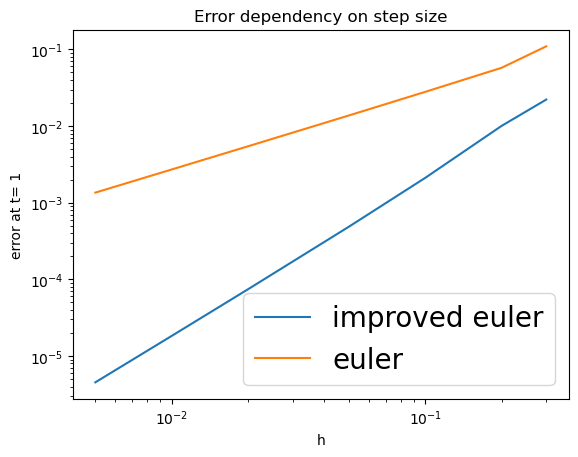

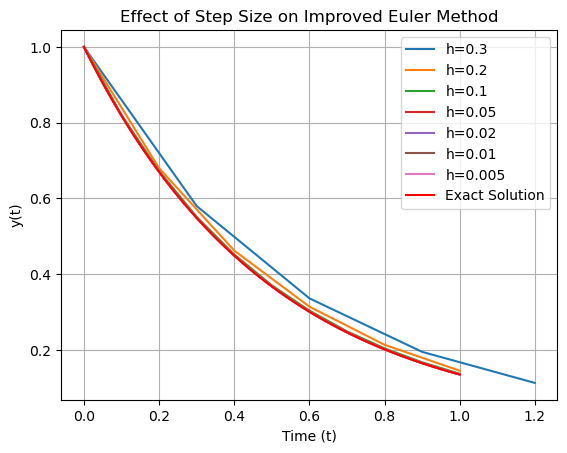

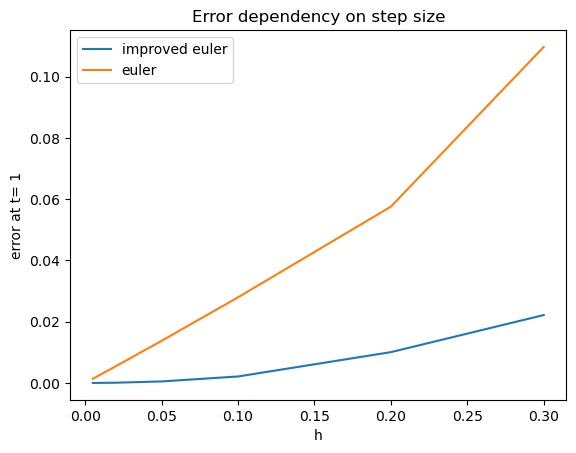

Text(0.5, 1.0, 'Error dependency on step size')

In [54]:
h_values = [0.3,0.2,0.1,0.05,0.02,0.01, 0.005]
y_end = np.zeros_like(h_values)
y_euler = np.zeros_like(h_values)
t0 = 0
y0 = 1.0
t_end = 1.0
t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)
plt.figure()
for i,h in enumerate(h_values):
    t_values, y_values = improved_euler_method(ode1, t0, y0, h, t_end)
    plt.plot(t_values, y_values, label="h="+str(h))
    y_end[i] = y_values[-1]
plt.plot(t_exact, y_exact, 'r-', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Effect of Step Size on Improved Euler Method')
plt.legend()
plt.grid(True)

plt.show() 

for i,h in enumerate(h_values):
    t_values, y_values = euler_method(ode1, t0, y0, h, t_end)
    y_euler[i] = y_values[-1]

plt.figure()
error_ie = np.abs(y_end - y_exact[-1])
error_euler = np.abs(y_euler - y_exact[-1])
plt.plot(h_values,error_ie,label = 'improved euler')
plt.plot(h_values,error_euler,label = 'euler')
plt.xlabel('h')
plt.ylabel('error at t= 1')
plt.legend()
plt.title('Error dependency on step size')
plt.show()
plt.figure()
plt.loglog(h_values,error_ie,label = 'improved euler')
plt.loglog(h_values,error_euler,label = 'euler')
plt.xlabel('h')
plt.ylabel('error at t= 1')
plt.legend(fontsize = 20)
plt.title('Error dependency on step size')

## Fourth-Order Runge-Kutta Method (RK4)
A more sophisticated higher-order method is the **Fourth-Order Runge-Kutta Method (RK4)**, which provides a very accurate solution by computing four intermediate slopes:
1. **Slope 1**:
   $$
   k_1 = f(t_n, y_n)
   $$
2. **Slope 2**:
   $$
   k_2 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} k_1\right)
   $$
3. **Slope 3**:
   $$
   k_3 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} k_2\right)
   $$
4. **Slope 4**:
   $$
   k_4 = f(t_n + h, y_n + h \cdot k_3)
   $$

The final update for \( y \) is a weighted average of these slopes:
$$
y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

### Advantages of Higher-Order Methods
- **Increased Accuracy**: Higher-order methods such as Heun's method and RK4 are much more accurate than the standard first-order Euler method for the same step size.
- **Better Stability**: These methods handle larger step sizes better without introducing significant errors.

### Conclusion
Higher-order methods like the Second-Order Euler (Heun’s Method) and the Fourth-Order Runge-Kutta (RK4) are widely used in practice due to their improved accuracy and stability compared to the first-order Euler method. However, they also require more computational effort per step, as they involve multiple evaluations of the slope at each time step.


# Exercises for Students

## Exercises
1. Solve the ODE $\frac{dy}{dt} = -3y + 5$ with $y(0) = 1$ using Euler's method. Compare the numerical solution with the exact solution.
2. Experiment with different step sizes (e.g., $h = 0.05, h = 0.01$) and analyze how the step size affects the accuracy.
3. Try solving a non-linear ODE, such as $\frac{dy}{dt} = y^2 - t$, and observe how Euler's method behaves.

You can extend the code provided above to solve these ODEs.



## Conclusion
Euler's method is a simple and intuitive technique for numerically solving ODEs. While it is easy to implement, its accuracy depends on the step size, and for certain problems, more advanced methods like Runge-Kutta may be preferred.

We encourage you to try different ODEs and see how Euler's method performs.
